In [ ]:
!pip install pandas
!pip install sklearn
!pip install matplotlib

# Репозиторий !!!!
UCI (UCI Machine Learning Repository)
https://archive.ics.uci.edu/ml/datasets.php
http://econ.sciences-po.fr/thierry-mayer/data
https://towardsdatascience.com/top-sources-for-machine-learning-datasets-bb6d0dc3378b

## https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#economics-and-finance

https://github.com/rsvp/fecon235/blob/master/nb/fred-eurozone.ipynb

Пример решения задачи множественной регрессии с помощью Python

## Загружаем необходимые библиотеки и файл с данными

In [1]:
import pandas as pd
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib 
#Загружаем данные из файла
dataset = pd.read_csv('ENB2012_data.csv',decimal=",",delimiter=";")
# Выводим верхние строки таблицы
dataset.head()

Using matplotlib backend: Qt5Agg


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Проверяем на наличие нужных колонок и отсутствие пустых колонок

In [2]:
dataset.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

## Проверяем корректность типов данных

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


## Проверяем на наличие нулевых (NULL) данных

In [4]:
dataset.isnull().values.any()

False

## Определяем размерность данных

In [5]:
dataset.shape

(768, 10)

##  Получим некоторую сводную информацию по всей таблице.
Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [6]:
dataset.describe()

#dataset.groupby('Y1')['Y2'].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Определяем корреляцию между ячейками

Построим корреляционную матрицу. Все ее недиагональные положительнын значения относительно Y1 и Y2

In [7]:
dataset.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000e+00,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000e+00,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000e+00,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000e+00,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000e+00,1.861418e-18,0.000000e+00,0.889431,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.213992e-19,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,1.213992e-19,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000e+00,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


## Уберем лишние столбцы

### Еще можно удалить строки или столбцы с пустыми значениями:
    удалить столбцы с такими значениями (dataset = dataset.dropna(axis=1)),
    удалить строки с такими значениями (dataset = dataset.dropna(axis=0)).
### Можно заполнить элементы с пустыми значениями
    dataset = dataset.fillna(dataset.median(axis=0), axis=0)


In [8]:
dataset = dataset.drop(['X2','X4','X7'], axis=1)
dataset.head()

,X1,X3,X5,X6,X8,Y1,Y2
0,0.98,294.0,7.0,2,0,15.55,21.33
1,0.98,294.0,7.0,3,0,15.55,21.33
2,0.98,294.0,7.0,4,0,15.55,21.33
3,0.98,294.0,7.0,5,0,15.55,21.33
4,0.90,318.5,7.0,2,0,20.84,28.28


## Нарисуем график

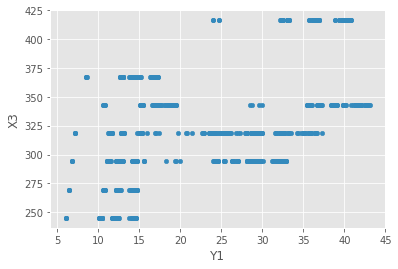

In [9]:
dataset.plot.scatter(x='Y1', y='X3')

Функция scatter_matrix из модуля pandas.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

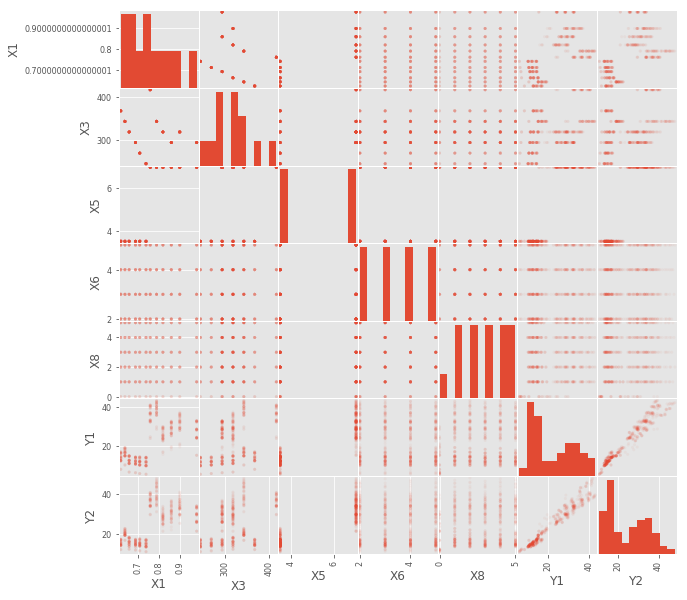

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.05, figsize=(10, 10));

## После обработки данных можно перейти к построению модели.

Для построения модели будем использовать следующие методы:

    Метод наименьших квадратов
    Случайный лес
    Логистическую регрессию
    Метод опорных векторов
    Метод ближайших соседей
Оценку будем производить с помощью коэффициента детерминации (R-квадрат). Данный коэффициент определяется следующим образом:

[LaTeX:R^2 = 1 - \frac{V(y|x)}{V(y)} = 1 - \frac{\sigma^2}{\sigma_y^2}]

, где image — условная дисперсия зависимой величины у по фактору х.
Коэффициент принимает значение на промежутке [LaTeX:[0,1]] и чем он ближе к 1 тем сильнее зависимость.
Ну что же теперь можно перейти непосредственно к построению модели и выбору модели. Давайте поместим все наши модели в один список для удобства дальнейшего анализа:

In [11]:
models = [LinearRegression(), # метод наименьших квадратов
	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
	          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
	          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
	          LogisticRegression() # логистическая регрессия
	          ]

## Разбиваем данные на обучающую (30%) и тестовую последовательность(70%) используя train_test_split

In [12]:
#separating independent and dependent variable
trg = dataset[['Y1','Y2']] # В качестве управляемых переменных Y1,Y2
trn = dataset.drop(['Y1','Y2'], axis=1) # В качестве неуправляемых переменных все X

Xtrain, Xtest, Ytrain, Ytest = train_test_split(trg, trn, test_size=0.3, random_state = 11)
N_train = Xtrain.shape 
N_test = Xtest.shape 
print (N_train, N_test)


#Ytrain
#Xtrain.values


(537, 2) (231, 2)


## Устанавливаем разные типы регрессии, обучаем модель, проверяем модель на тестовых данных.

### Линейная регрессия

In [13]:
model1 = LinearRegression()

m1 = str(model1)
model1.fit(Xtrain, Ytrain)

# Predicting the Test set results
y_pred = model1.predict(Xtest)
print("Линейная регрессия - правильность на обучающем наборе: {:.2f}".format(model1.score(Xtrain, Ytrain)))                       
print("Линейная регрессия - правильность на тестовом наборе: {:.2f}".format(model1.score(Xtest, Ytest)))


Линейная регрессия - правильность на обучающем наборе: 0.22
Линейная регрессия - правильность на тестовом наборе: 0.21


### Случайный лес

In [14]:
model1= RandomForestRegressor(n_estimators=100, max_features ='sqrt')
m1 = str(model1)
model1.fit(Xtrain, Ytrain)

# Predicting the Test set results
y_pred = model1.predict(Xtest)

print("Случайный лес - правильность на обучающем наборе: {:.2f}".format(model1.score(Xtrain, Ytrain)))                       
print("Случайный лес - правильность на тестовом наборе: {:.2f}".format(model1.score(Xtest, Ytest)))

Случайный лес - правильность на обучающем наборе: 0.97
Случайный лес - правильность на тестовом наборе: 0.73


Мы применили метод score к тестовым данным и тестовым ответам и обнаружили, что наша
модель демонстрирует правильность около 72%. Это означает, что модель
выдает правильные прогнозы для 72% наблюдений тестового набора.

## Метод ближайших соседей

In [32]:
# SVR(kernel='linear'), # метод опорных векторов с линейным ядром
# LogisticRegression() # логистическая регрессия

model1= KNeighborsRegressor(n_neighbors=4)
m1 = str(model1)
model1.fit(Xtrain, Ytrain)

# Predicting the Test set results
y_pred = model1.predict(Xtest)

print("Ближайших соседей - правильность на обучающем наборе: {:.2f}".format(model1.score(Xtrain, Ytrain)))                       
print("Ближайших соседей - правильность на тестовом наборе: {:.2f}".format(model1.score(Xtest, Ytest)))

Ближайших соседей - правильность на обучающем наборе: 0.90
Ближайших соседей - правильность на тестовом наборе: 0.75


## Метод логистическая регрессия

In [35]:
# логистическая регрессия
# create and configure model
model1 = LogisticRegression(solver='lbfgs')
 	
# create and configure model
#model1 = LogisticRegression(solver='lbfgs', multi_class='ovr')
m1 = str(model1)
model1.fit(Xtrain, Ytrain)

# Predicting the Test set results
y_pred = model1.predict(Xtest)

print("Метод опорных векторов с линейным ядром - правильность на обучающем наборе: {:.2f}".format(model1.score(Xtrain, Ytrain)))                       
print("Метод опорных векторов с линейным ядром - правильность на тестовом наборе: {:.2f}".format(model1.score(Xtest, Ytest)))

ValueError: bad input shape (537, 5)

# Второй вариант

In [ ]:
# -*- coding: utf-8 -*-
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split

dataset = read_csv('ENB2012_data.csv',';')

dataset.corr()

dataset = dataset.drop(['X1','X4'], axis=1)

trg = dataset[['Y1','Y2']]
trn = dataset.drop(['Y1','Y2'], axis=1)

models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          LogisticRegression() # логистическая регрессия
          ]

Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)

#создаем временные структуры
TestModels = DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in  range(Ytrn.shape[1]):
        #обучаем модель
        model.fit(Xtrn, Ytrn[:,i]) 
         
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest[:,0], model.predict(Xtest))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')

model = models[1]
model.fit(Xtrn, Ytrn)

model.feature_importances_

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
r = boston.data.shape
r

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score

dataset = load_boston()
target = np.array(dataset.feature_names) == "DIS"
X = dataset.data[:, np.logical_not(target)]
y = dataset.data[:, target].squeeze()
y_trans = quantile_transform(dataset.data[:, target],
                             n_quantiles=300,
                             output_distribution='normal',
                             copy=True).squeeze()
dataset.data

In [ ]:
# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}
    

In [ ]:
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.exp((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

In [ ]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, **density_param)
ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Synthetic data", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Пример на реальных данных Бостон

In [ ]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer, quantile_transform

dataset = load_boston()
target = np.array(dataset.feature_names) == "DIS"
X = dataset.data[:, np.logical_not(target)]
y = dataset.data[:, target].squeeze()
y_trans = quantile_transform(dataset.data[:, target],
                             n_quantiles=300,
                             output_distribution='normal',
                             copy=True).squeeze()

In [ ]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, **density_param)
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [ ]:
X_train
#y_train

In [ ]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0.scatter(y_test, y_pred)
ax0.plot([0, 10], [0, 10], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Ridge regression \n without target transformation')
ax0.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0.set_xlim([0, 10])
ax0.set_ylim([0, 10])

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=300,
                                    output_distribution='normal'))
# --------------------------------------------------------------------
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)

ax1.scatter(y_test, y_pred)
ax1.plot([0, 10], [0, 10], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')
ax1.set_title('Ridge regression \n with target transformation')
ax1.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 10])

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

plt.show()